# Ejemplo: MLP para regresión (tarea)

**Tarea Auto MPG:** $\;$ predicción de consumo de combustible en ciudad (en MPG, miles per gallon) con 3 variables discretas y 5 continuas [https://archive.ics.uci.edu/dataset/9/auto+mpg](https://archive.ics.uci.edu/dataset/9/auto+mpg)

**Datos originales:** $\;$ bajamos los datos originales en una celda de código separada (para no repetir bajadas)

In [1]:
import warnings; warnings.filterwarnings('ignore'); import pandas as pd; import seaborn as sns
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True);

**Datos de trabajo:** $\;$ originales con tratamiento de datos perdidos

In [2]:
data = raw_data.copy(); data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [3]:
data = data.dropna(); data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data = pd.get_dummies(data, columns=['Origin'], prefix='', prefix_sep=''); data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


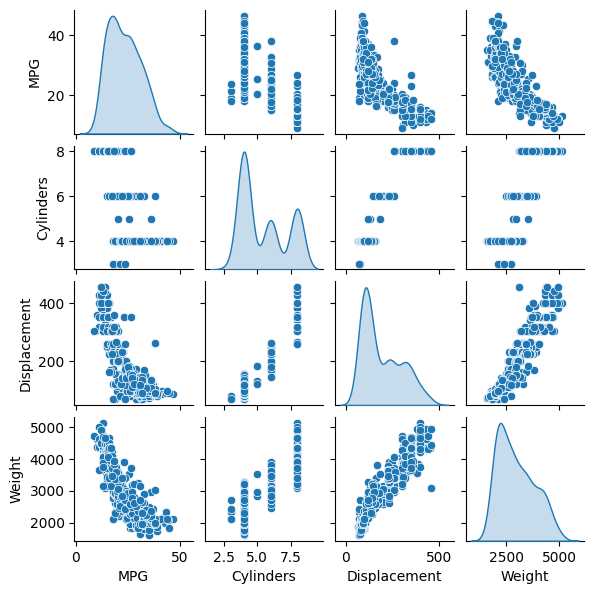

In [6]:
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde', height=1.5);